# Thera Bank Personal Loan Modelling Project.

## Contents:
------------------------
-  . <a href = #link100>Context:</a>
- 1. <a href = #link1>Importing Libraries</a>
- 2. <a href = #link2>Reading and Review of the dataset</a>
- 3. <a href = #link3>Feature of the artributes description</a>
- 4. <a href = #link4>Checking for error, duplicates and missing vales</a>
- 5. <a href = #link5>Transposing index and columns</a>
- 6. <a href = #link6>EDA Discriptive Observations </a>
- 7. <a href = #link7>Visualization</a>
- 8. <a href = #link8>Univariate and Bivariate Analysis</a>
- 9. <a href = #link9>Checking for correlation</a>
- 10. <a href = #link10>Get Data Ready & Building Model using Sklearn 
Library.</a>
- 11. <a href = #link11>Logistic Regression model to prediction</a>
- 12. <a href = #link13>Different parameters of Logistic Regression</a>
- 13. <a href = #link14>LogisticRegression & Data split of 70:30 ratio</a>
- 14. <a href = #link17>Model Evaluation.</a>
- 15. <a href = #link15>Business understanding of the model</a>
- 16. <a href = #link16>References & GitHub Link.</a>





### Domain: Banking  

### <a id='link100'> Context:</a>
This case is about a bank (Thera Bank) whose management wants to explore ways of converting 
its liability customers to personal loan customers (while retaining them as depositors). A 
campaign that the bank ran last year for liability customers showed a healthy conversion rate of 
over 9% success. This has encouraged the retail marketing department to devise campaigns 
with better target marketing to increase the success ratio with a minimal budget.

**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loan?
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or 
incorrect imputation. 
2. EDA: Study the data distribution in each attribute and target variable, share your findings 

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively 
4. Use Logistic Regression model to predict whether the customer will take personal loan or not. 
* Print all the metrics related for evaluating the model performance 
5. Check different parameters of Logistic Regression and give your reasoning whether the 
* model performance is affected due to it or not?
6. Give Business understanding of your model? 


### <a id='link1'>Importing Libraries.</a>

In [171]:
# Import standerd pakages.

import pandas as pd     # linear algebra library For mathematical calculations
import numpy as np      # Data processing
import seaborn as sns   # Library for data visualization.
import matplotlib.pyplot as plt # Library to plot. 
%matplotlib inline 
sns.set(color_codes=True) 
#sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (8,4)
import warnings         # Library To ignore any warnings
warnings.filterwarnings('ignore')



### <a id='link2'>Reading & Review of Dataset.</a> 

In [172]:
# Reading the dataset.

Bank_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv").copy()
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [173]:
#print shape of the dataset contains (5000r,14c).

Bank_df.shape

(5000, 14)

In [174]:
Bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [175]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [176]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
Bank_df.dtypes

# 13 int64 objects and one float64 object found.

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Observation.

* Most of the Attributes are int64,float64 no characters or objects.


In [177]:
# Names of the of the variables in the datasets.

print(Bank_df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


### Observation.

* We have 13 independent variables and one dependent veriable (personal loan) also we have 5000 rows which can be split into test and train dataset.

### <a id='link3'>Features Of The Attributes Description.</a>  


* Customer ID

* Age: Customer's age in completed years

* Experience: #years of professional experience

* Income: Annual income of the customer ($000)

* ZIP Code: Home Address ZIP code.

* Family: Family size of the customer

* CCAvg: Avg. spending on credit cards per month ($000)

* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

* Mortgage: Value of house mortgage if any. ($000)

* Personal Loan: Did this customer accept the personal loan offered in the last campaign?

* Securities Account: Does the customer have a securities account with the bank?

* CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?

* Online: Does the customer use internet banking facilities?

* Credit card: Does the customer use a credit card issued by the bank?

* For further analysis no need for 'ID', 'Zip_Code', & 'Experience' we will drop this three columns since 'ID' & 'Zip_Code' are  just numbers of series & 'Experience' is highly correlated with 'Age'. 


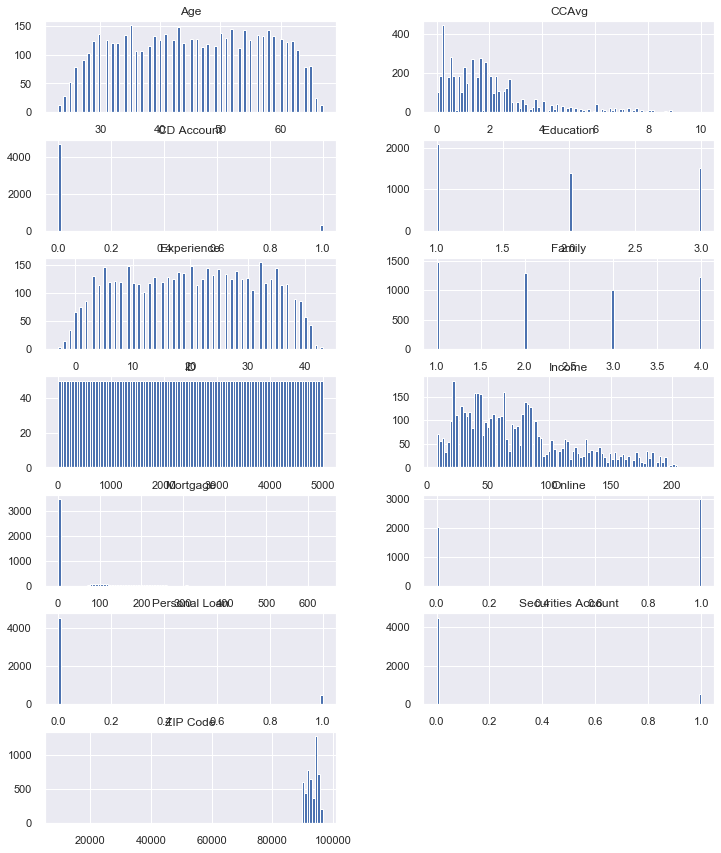

In [178]:
columns = list(Bank_df)[0:-1] # Excluding Outcome column which has only 
Bank_df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns


### <a id='link4'>Checking For Dataset Error, Duplicates & Missing Values.</a>  

In [179]:
# Checking If there are any null values in the dataset.
Bank_df.isnull().values.any() 

False

In [180]:
# The following code to check duplicates in the datasets.

dupes = Bank_df.duplicated()
sum(dupes) 

# Results no duplicates.

0

In [181]:
# the following code to check missing values in the datasets. 

Bank_df.isnull().any().sum()

# Results no missing values.

0

In [182]:
# Checking for negative values in 'Personal Loan column'.
Bank_df['Personal Loan'].value_counts() 
# No negative values in the targeted variable 'Personal Loan'.

0    4520
1     480
Name: Personal Loan, dtype: int64

In [183]:
# Printing the negative values in 'Experience' column.
Bank_df[Bank_df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [184]:
# Total records of negative values of experience.
Bank_df[Bank_df['Experience'] < 0]['Experience'].count()

52

In [185]:
# Checking for dataset correlation.
Bank_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


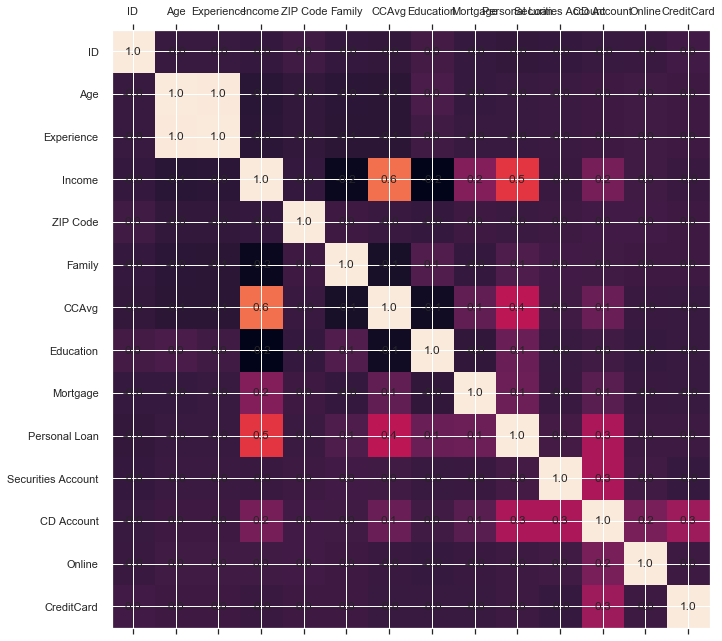

In [187]:
# Checking the correlation in graphical representation.
def plot_corr(df, size=11):
    corr = Bank_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_corr(Bank_df)

###  
* In the above plot white color represents maximum correlation and the dark maroon color represents minimum correlation. We can see none of the variables have a correlation with any other variables.


### Observation.

* Personal Loan doesn't indicate that the variations with the Age and Experience.
* Income has a strong effect on Personal Loan customers with high income has more chances of buying a loan.
* Customers want to have a high Mortgage are open for buying a Personal Loan.
* CCAvg indicates a strong relationship with Personal Loan.
* Customers with Personal Loan has high Avg spending on CreditCard per month.
* 0 or false indicates that there is no missing or duplicate values.
* 52 records with negative 'Experience' are found in the dataset.
* Minimum value of 'Experience column in the dataset indicates -3.0 which might be an error because 
* 'Experience cannot be negative this need to be fixed.
* Above plots we can see that 'Age' has very strong and possitive association with 'Experience'.





### <a id='link5'>Transposing index and columns.</a>  

In [188]:
# Five point summary of attributes. 

Bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,5000.00,93152.50,2121.85,9307.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


### Observation. 

* Binary variables 'Personal Loan', 'CreditCard', 'Online', 'CD Account', 'Security Account' has clean data.
* 'Famiily' & 'Education' oridinary cat variables they are also has a clean data. 



In [189]:
Bank_df.mean()

ID                    2500.50
Age                     45.34
Experience              20.10
Income                  73.77
ZIP Code             93152.50
Family                   2.40
CCAvg                    1.94
Education                1.88
Mortgage                56.50
Personal Loan            0.10
Securities Account       0.10
CD Account               0.06
Online                   0.60
CreditCard               0.29
dtype: float64

In [190]:
Bank_df.median()

ID                    2500.50
Age                     45.00
Experience              20.00
Income                  64.00
ZIP Code             93437.00
Family                   2.00
CCAvg                    1.50
Education                2.00
Mortgage                 0.00
Personal Loan            0.00
Securities Account       0.00
CD Account               0.00
Online                   1.00
CreditCard               0.00
dtype: float64

### <a id='link6'>EDA Discriptive Observations.</a>  

* The dataset got 0 missing values.
* It have 7 numeric variables- ('Age', 'CC_Avg', 'ID', 'Income', 'Mortgage', 'Zip_Code', 'Experience'
* It have 2 categorical variables- 'Education', 'Family'
* It have 5 Boolean variables- 'CD Account', 'Credit Card', 'Online', 'Personal Loan', 'Securites Account'

* Note to mention Personal loan is highly correlated with income, an average of spending on credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.

* Also Experience is highly correlated with Age





In [191]:
Bank_df.head().T

,0,1,2,3,4
ID,1.00,2.00,3.00,4.00,5.00
Age,25.00,45.00,39.00,35.00,35.00
Experience,1.00,19.00,15.00,9.00,8.00
Income,49.00,34.00,11.00,100.00,45.00
ZIP Code,91107.00,90089.00,94720.00,94112.00,91330.00
Family,4.00,3.00,1.00,1.00,4.00
CCAvg,1.60,1.50,1.00,2.70,1.00
Education,1.00,1.00,1.00,2.00,2.00
Mortgage,0.00,0.00,0.00,0.00,0.00
Personal Loan,0.00,0.00,0.00,0.00,0.00


### Number of unique in each column.


In [192]:
# printing number of unique in each column.

Bank_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [193]:
# printing number of count in the dataset.
Bank_df.nunique().count()

14

In [194]:
# printing sum of unique in the dataset.
Bank_df.nunique().sum()

6193

### Observation.

* Will remove the 'Personal Loan' from the categorical variables list as it is the target variable(Dependent Variable).
* Will remove 'ID' from the continuous variable list because it is not going to be part of the data modeling.



### Number of people with zero mortgage.


In [195]:
Bank_df["Mortgage"].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [196]:
# bellow two solutions to print number of people with zero mortgage.
(Bank_df['Mortgage'] == 0).sum()

3462

In [197]:
# Printing number of people with zero mortgage
Bank_df[Bank_df.Mortgage==0]['Mortgage'].count()

3462

### People with zero credit card spending per month.

In [198]:
# bellow two solutions to print people with zero credit card spending.
(Bank_df['CCAvg'] == 0).sum()

106

In [199]:
# Printing people with zero credit card spending.
len(Bank_df[Bank_df.CCAvg==0])

106

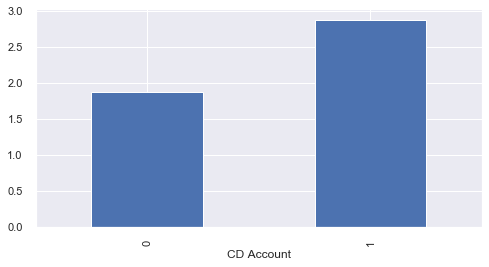

In [200]:
# Polt people with zero credit card spending.
Bank_df.groupby('CD Account')['CCAvg'].mean().plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,4)


* The total number of people with zero credit card spending  per month is (106).

### Value counts of categorical columns.

In [201]:
# rinting dtype.
Bank_df.select_dtypes(include='category').count()

Series([], dtype: int64)

In [202]:
# To count and print of categorical columns.
categorical_variables=[col for col in Bank_df.columns if Bank_df[col].nunique()<=5]
print(categorical_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [203]:
# To count and print of continuous variable.
continuous_variables=[col for col in Bank_df.columns if Bank_df[col].nunique()>5]
print(continuous_variables)

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


### Observation.


* 7 numeric variables- ('Age', 'CC_Avg', 'ID', 'Income', 'Mortgage', 'Zip_Code', 'Experience'.
* 2 categorical variables- 'Education', 'Family'
* 5 Boolean variables- 'CD Account', 'Credit Card', 'Online', 'Personal Loan', 'Securites Account'.
* Note to mention Personal loan is highly correlated with income, an average of spending on credit cards & mortgage if the customer has a certificate of deposit (CD) account with the bank.
* Experience is highly correlated with Age.


### <a id='link7'> Data Visualization.</a>

* Pair plot includes all the columns of the datasets.



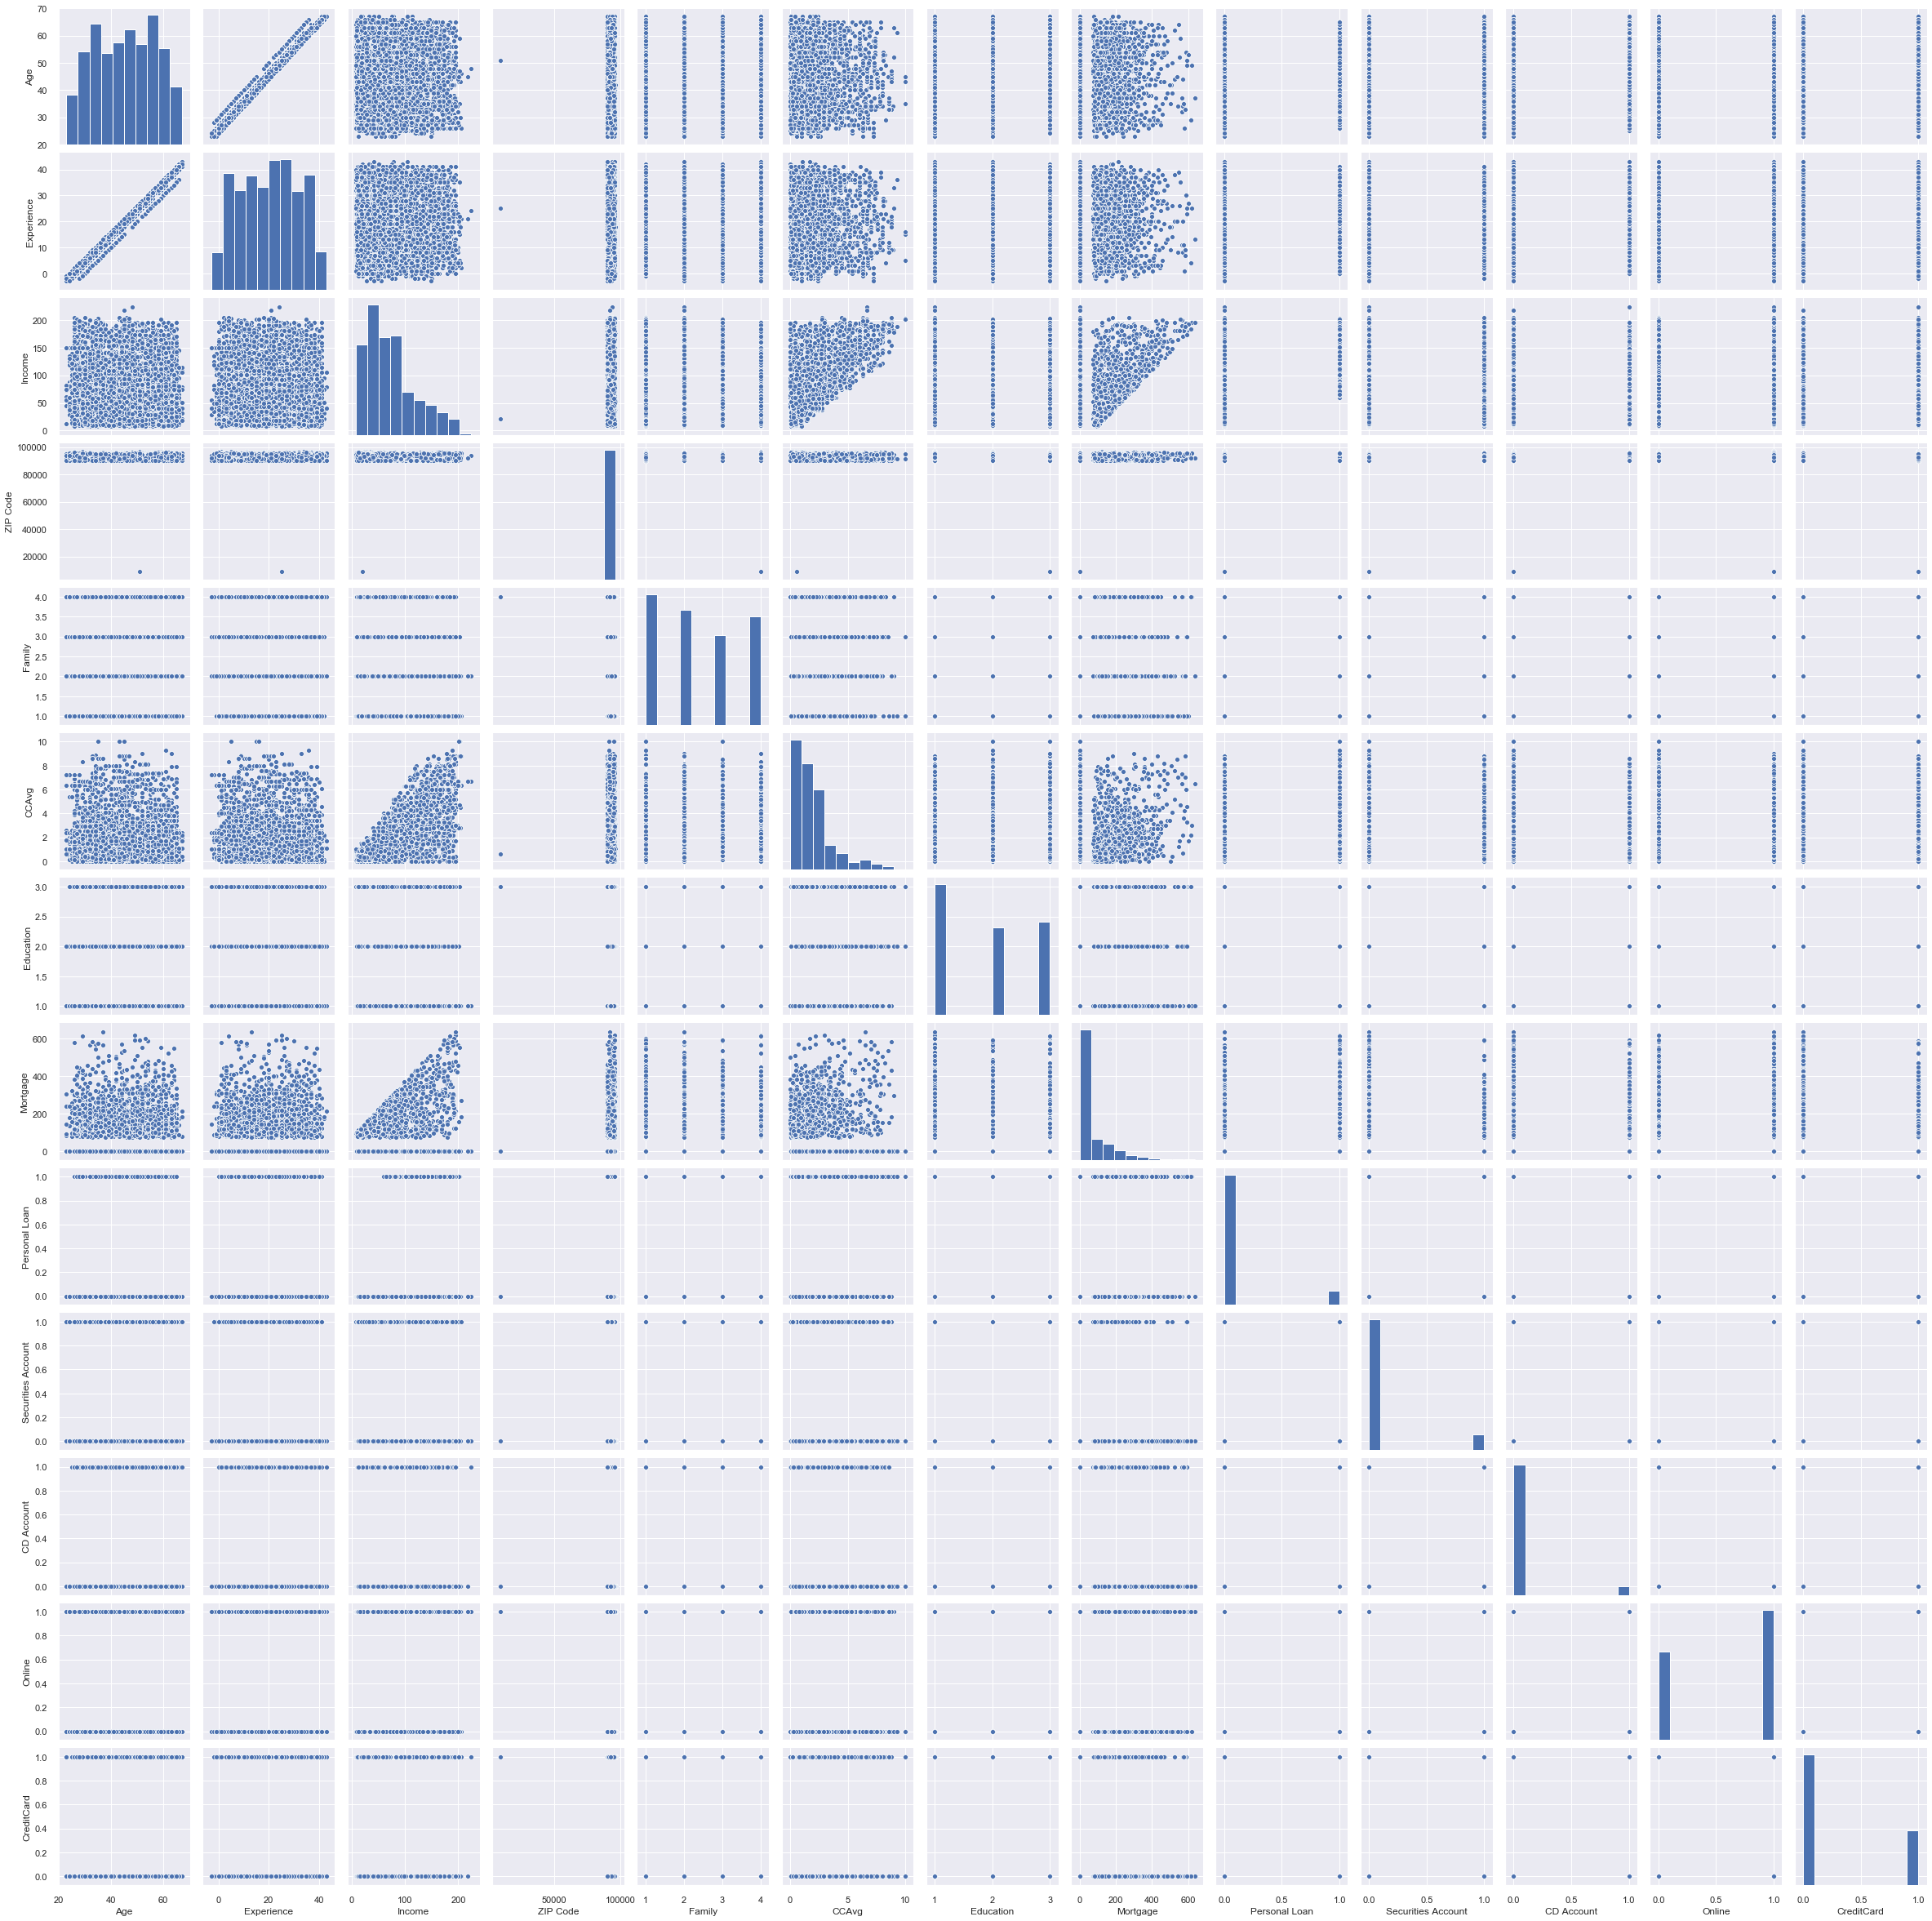

In [204]:
# The following code to plot
sns.pairplot(Bank_df.iloc[:,1:])
plt.rcParams['figure.figsize'] = (10,8)

### <a id='link8'> Univariate and Bivariate.</a> 

* We, Will, analyze each column in the dataset (Independent Attributes) & (Dependent Attributes) with the target variable 'Personal loan' and relating them to find a pattern in the dataset.
* Analysing the distribution of particular attributes (Continuous variables).



In [205]:
df= Bank_df.copy()

In [206]:
df.groupby(['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.17,45.37,20.13,66.24,93152.43,2.37,1.73,1.84,51.79,0.10,0.04,0.60,0.29
1,2390.65,45.07,19.84,144.75,93153.20,2.61,3.91,2.23,100.85,0.12,0.29,0.61,0.30


In [207]:
df.groupby(['Personal Loan']).median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2518.50,45.00,20.00,59.00,93437.00,2.00,1.40,2.00,0.00,0.00,0.00,1.00,0.00
1,2342.00,45.00,20.00,142.50,93407.00,3.00,3.80,2.00,0.00,0.00,0.00,1.00,0.00


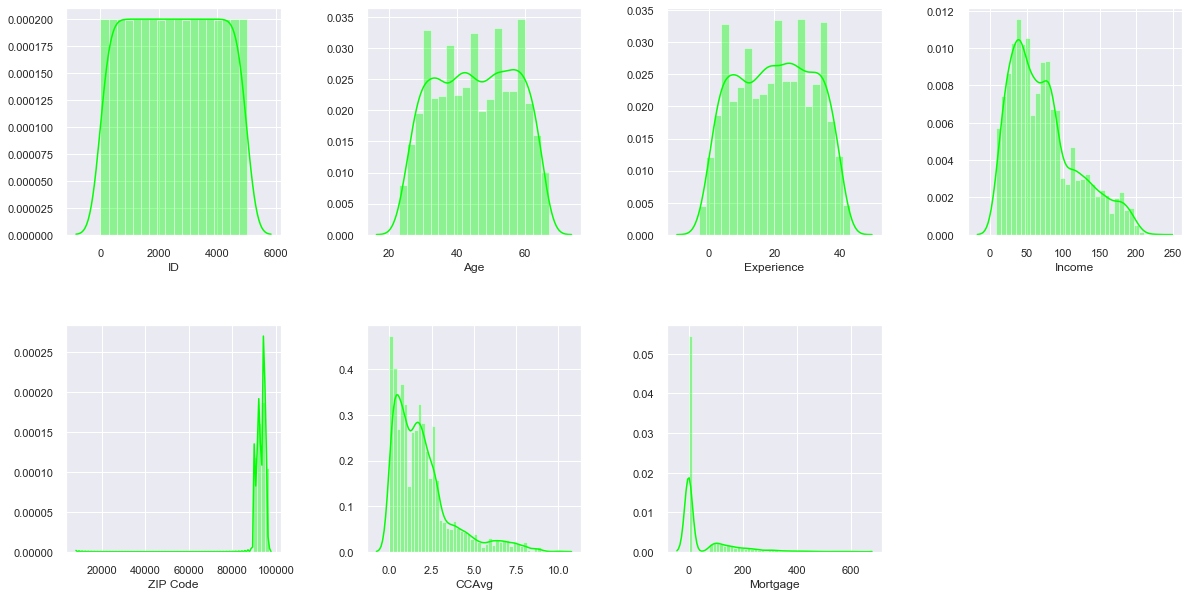

In [208]:
# Analyzing the distributions of particular attributes of continuous variables.
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,4,i+1)
    sns.distplot(Bank_df[col],color='lime')

### Observation.

* Age & Experience are uniformly distributed & showing a good similarites in distribution.
* Mortgage contains zero values we need to check why?
* Income, CCAvg, both are positive skewed to the right.
* ZipCode is negative skewed to the left it might also has values from a single region.



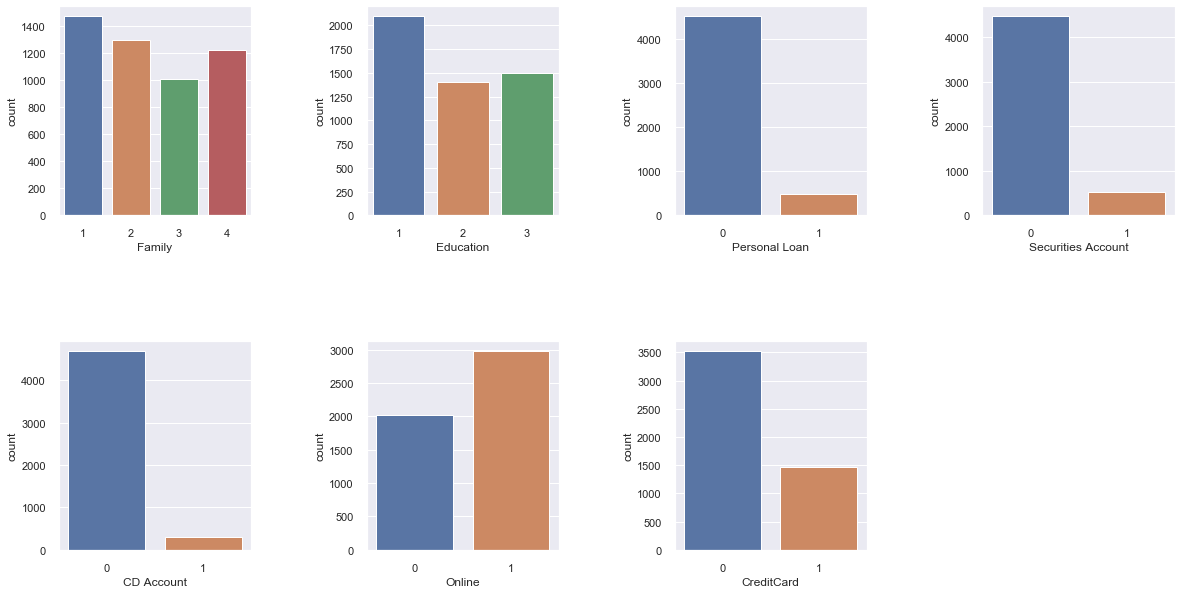

In [209]:
# Analyzing the distributions of particular attributes of continuous variables.
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.6,hspace=0.6)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(Bank_df[col])

In [210]:
# Analyzing the distributions of particular attributes of continuous variables.
con=continuous_variables.copy()
con.remove('Income') # removing income.

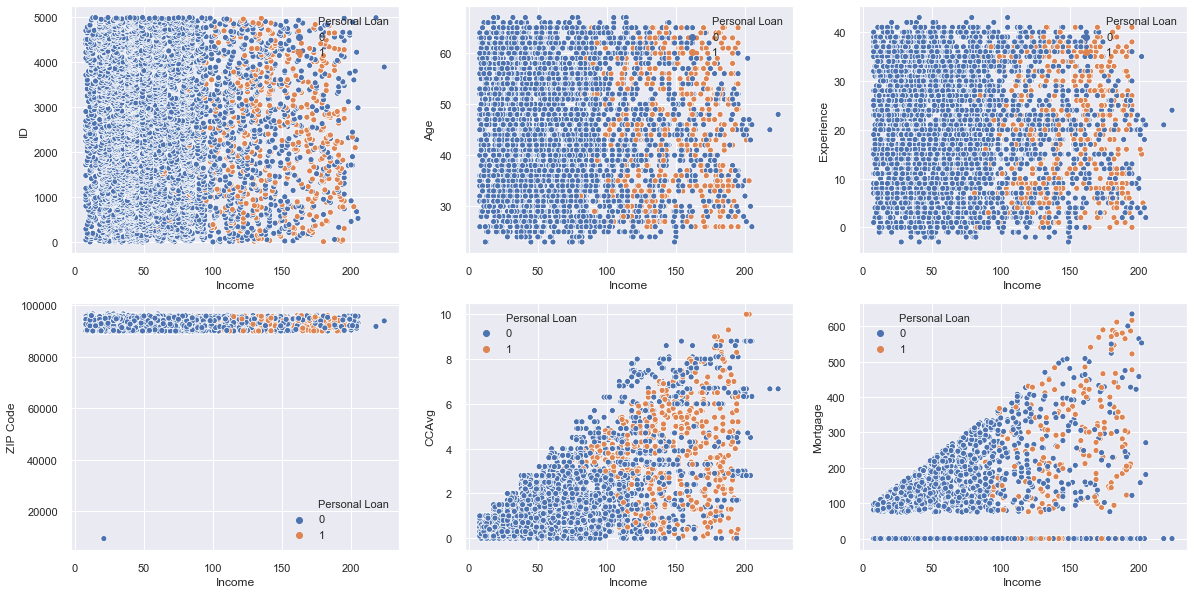

In [211]:
# Analyzing the distributions of particular attributes of continuous variables.
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal Loan',data=Bank_df)

### Observation.

* Income is a strong attribute that affects the chances of buying a 'Personal Loan' the higher the income the high the chances customers buying a loan here we will analyze income with other attributes.
* Age and Experience indicate that don't have much effect on the customer to have a loan or not. 
* High 'Income' customers tend to have higher chances to buy a Personal loan.
* note to mention the relationship of customers that have high income and having a personal loan Avg of higher spending on credit card per month & higher value of house 'Mortgage'.
* ZipCode indicates the majority of the customers are living in a particular area and they have no pattern in chances of buying a 'Personal Loan'.


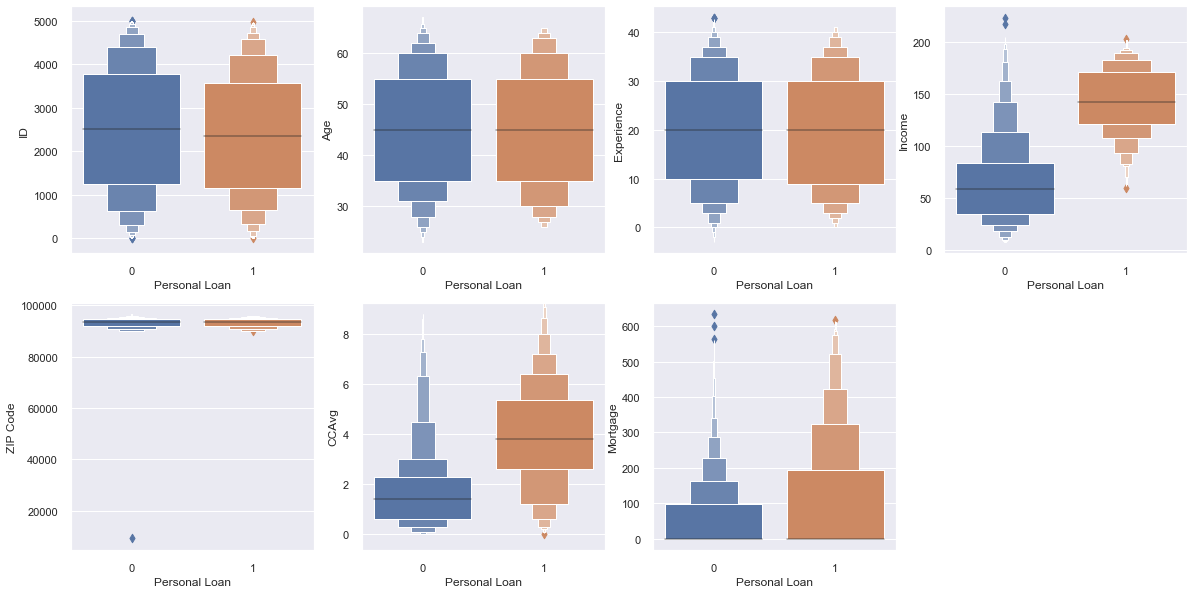

In [212]:
# Analyzing the distributions of particular attributes of continuous variables.
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxenplot(y=Bank_df[col],x=Bank_df['Personal Loan'])

### Observation.

* Age column is normally distributed.
* Customers age is between 25 to 65 years.
* Income is positively skewed and it will also have the outlier.
* Zip code dont have any relationship with other vaiables.
* Experience is normally distriduted.
* Family and Education has low associate with personal loan.
* CCAvg distribution is posivtively skewed variable majority customers average monthly spending is btween 1K to 9K.
* 'Mortgage' majority of customers have less than 40K.
* Most of the customers don't have a Securities Account.
* Majority of the customers have CD Account and CreditCard.
* Majority of the customers using online services.
* Majority of the customer are undergraduate and with family between 1 to 5


### <a id='link9'> Checking for correlation.</a>

In [213]:
# The printing dataset correlation of particular attributes.
Bank_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.00,-0.01,0.50,0.37,0.14
Age,-0.01,1.00,-0.06,-0.05,-0.01
Income,0.50,-0.06,1.00,0.65,0.21
CCAvg,0.37,-0.05,0.65,1.00,0.11
Mortgage,0.14,-0.01,0.21,0.11,1.00


In [214]:
#The printing dataset correlation of 'Personal Loan' with other dataset attributes.
Bank_df.corr()['Personal Loan']

ID                   -0.02
Age                  -0.01
Experience           -0.01
Income                0.50
ZIP Code              0.00
Family                0.06
CCAvg                 0.37
Education             0.14
Mortgage              0.14
Personal Loan         1.00
Securities Account    0.02
CD Account            0.32
Online                0.01
CreditCard            0.00
Name: Personal Loan, dtype: float64

In [215]:
Bank_df[Bank_df.columns[:]].corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


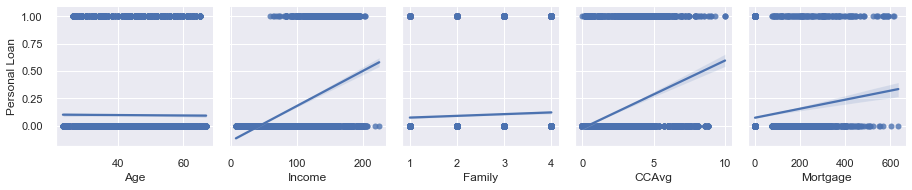

In [216]:
# Checking the association of 'Personal Loan' with other quantitive variables.
quantitiveVar = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(Bank_df, y_vars ='Personal Loan', x_vars = quantitiveVar)
expGrid.map(sns.regplot)
plt.rcParams['figure.figsize'] = (8,4)

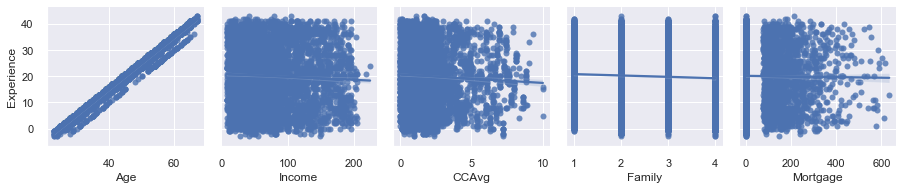

In [217]:
# Checking the association of 'Experience' with other quantitive variables.
quantitiveVar = ['Age', 'Income', 'CCAvg','Family', 'Mortgage']
expGrid = sns.PairGrid(Bank_df, y_vars ='Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)
plt.rcParams['figure.figsize'] = (8,4)

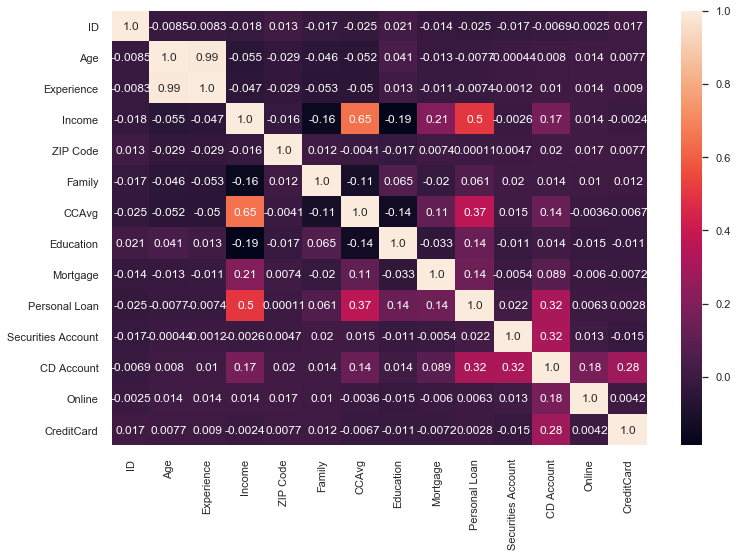

In [218]:
plt.figure(figsize=(12,8))
sns.heatmap(Bank_df.corr(), annot=True, fmt=".2")
plt.show()

### Observation.

* Personal Loan doesn't indicate that the variations with the Age and Experience.
* Income has a strong effect on Personal Loan customers with high income has more chances of buying a loan.
* Customers want to have a high Mortgage are open for buying a Personal Loan.
* CCAvg indicates a strong relationship with Personal Loan.
* Customers with Personal Loan has high Avg spending on CreditCard per month.


## <a id='link10'>Get Data Ready & Building Model using Sklearn Library.</a>



### Data Preparation

* Calculate CD Account ratio of True/False from outcome variable.

In [219]:
n_true = len(Bank_df.loc[Bank_df['CD Account'] == True])
n_false = len(Bank_df.loc[Bank_df['CD Account'] == False])
print("Number of true Personal Loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false Personal Loan: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true Personal Loan: 302 (6.04%)
Number of false Personal Loan: 4698 (93.96%)



* We have 6.04% of true number of custoers in the current dataset who have Personal Loan and 93.96% on false number don't have personal loans Its a good distribution True/False cases of customers with a personal loan in the dataset.
* Among the 93.9% number of false 'Personal Loan' there might be a good indication of getting more customers to buy the Personal loan.

In [220]:
df= Bank_df.copy()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [221]:

df.drop_duplicates(inplace=True)

In [222]:
# No duplicates entries so we can set the ID as index for the df.
df.shape

(5000, 14)

In [223]:
# To remove the "Personal Loan" from categorical_variables.
categorical_variables.remove("Personal Loan")
print(categorical_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [224]:
# To remove the "ID" from continuous_variables.
continuous_variables.remove("ID")
print(continuous_variables)

['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [226]:
# Since there is no duplicate values in the dataset we can set 'ID' as index of the DataFrame.
#df.set_indexi('ID', inplace=True)

In [227]:
# Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data.
df.drop('ZIP Code',axis=1,inplace=True)

In [228]:
#since Age shows a little better correlation with Personal loan we will drop the Experience attribute
df.drop('Experience',axis=1,inplace=True)

In [229]:
#since 'online' has no correlation with Personal loan we will drop this attribute.
df.drop('Online',axis=1,inplace=True)

In [230]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,5000.00,0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,5000.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00


In [231]:
df.nunique() # Checking of number of unique values.

ID                    5000
Age                     45
Income                 162
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
CreditCard               2
dtype: int64

## Creating New Attributes.
Will create a new feature Account contains 1 if any customer is holding either CD Account or Security Account or zero if the customer has more than one account and find the relation with the taregt variable 'Personal Loan'if it's indicates strong relation compaired with other two will keep it otherwise will drop it.

In [232]:
# Creating a new account.
df['Account']=df['CD Account']=df['Securities Account']

In [233]:
df.drop('Account',axis=1,inplace=True)

In [234]:
df[['CD Account','Securities Account','Personal Loan']].corr()
#Since it shows a week correlation as compaired to CD Account we will drop it

,CD Account,Securities Account,Personal Loan
CD Account,1.00,1.00,0.02
Securities Account,1.00,1.00,0.02
Personal Loan,0.02,0.02,1.00


In [235]:
df.head(3)

,ID,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,1,25,49,4,1.60,1,0,0,1,1,0
1,2,45,34,3,1.50,1,0,0,1,1,0
2,3,39,11,1,1.00,1,0,0,0,0,0


In [236]:
df['Personal Loan'].nunique()

2

In [237]:
df['Personal Loan'].value_counts(normalize=True)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

In [238]:
df['Income'].value_counts(normalize=True)

44    0.02
38    0.02
81    0.02
41    0.02
39    0.02
      ... 
189   0.00
202   0.00
205   0.00
224   0.00
218   0.00
Name: Income, Length: 162, dtype: float64

In [239]:
df['Income'].nunique()

162

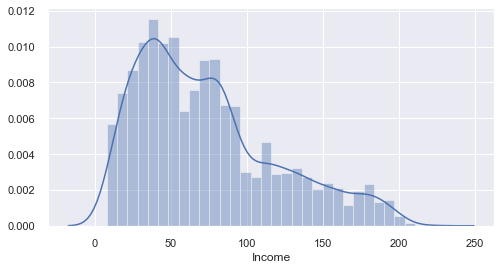

In [240]:
# 
sns.distplot(Bank_df['Income'])

### <a id='link14'>LogisticRegression & Data split  of 70:30 ratio.</a>

In [241]:
from sklearn.model_selection import train_test_split

# Define X and Y variables.
x = df.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
y = df['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train.head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard
1334,1335,47,35,2,1.30,1,0,0,0,0
4768,4769,38,39,1,2.00,2,0,0,0,0
65,66,59,131,1,3.80,1,0,0,0,1
177,178,29,65,4,1.80,2,244,0,0,0
4489,4490,39,21,3,0.20,2,0,0,0,0


In [242]:
# Converting Categorical Variables to dummy variables.
x = pd.get_dummies(x, drop_first=True)

In [243]:
# Import sklearn packages.
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

# Fit the model on train data.
logreg = LogisticRegression(random_state=7)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [244]:
# Feature Scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [245]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0    1    2    3    4    5    6    7    8     9  intercept
0 -0.04 0.09 2.36 0.79 0.29 1.33 0.08 0.06 0.06 -0.02      -4.35


In [246]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

In [247]:
print ('data is in training test', len(x_train)/len(Bank_df)*100, '%')
print ('data is in test set', len(x_test)/len(Bank_df)*100, '%')      

data is in training test 70.0 %
data is in test set 30.0 %


In [248]:
# Checking the model.
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
model.coef_

array([[-0.04021757,  0.09383081,  2.36447818,  0.79484141,  0.29036173,
         1.33285406,  0.08176708,  0.05920477,  0.05920477, -0.02230096]])

### <a id='link11'>Logistic Regression model to prediction.</a>



In [250]:
# Appending model list.
model_list.append('LogisticRegressiono')
lm =LogisticRegression()

In [251]:
# LogisticRegression.
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [252]:
 # fit the model on train data
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
yhat_lm=lm.predict(x_test)

In [254]:
# Making The Confusion Matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat_lm)

array([[1333,   18],
       [  69,   80]], dtype=int64)

In [255]:
# Calculating the Area under the curve ROC.
from sklearn.metrics import roc_curve, auc
LogReg_prob=model.predict_proba(x_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print('Area under the curve ROC : %f' % roc_auc1)

Area under the curve ROC : 0.938897


In [256]:
# Calculating the score.
lm_score=f1_score(y_test,yhat_lm)
model_f1_score.append(lm_score)
lm_score

0.6477732793522267

In [257]:
# Calculating the accuracy score.
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.942

In [258]:
# Printing the classification report.
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.82      0.54      0.65       149

    accuracy                           0.94      1500
   macro avg       0.88      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



### <a id='link17'>Model Evaluation.</a>

Initial observation on the classification report which consists of a (Precision, Recall, f1_score & support, also the accuracy_score, and a 2*2 cousion matrix. How to determine if the predicted model has done well or not looking at the accuracy,btween 94% accuracy is not a small thing, but knowing that from the data that the number of buyer's percentage to the non-buyer percentage is very less. Hence accuracy didn't play a big role in determining how the model performs.


In [259]:
from sklearn import preprocessing             # import library

col_name=df.columns                           # Get the columns name from the df
scaler=preprocessing.StandardScaler()         # Creating the scaler object
scaled_x_train=scaler.fit_transform(x_train)  # fit the dats on the scaler object
scaled_x_test=scaler.fit_transform(x_test)

In [260]:
model=LogisticRegression()
model.fit(scaled_x_train,y_train)  # Fitting the model into training dataset.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [261]:
# Calculating the Area under the curve ROC.
from sklearn.metrics import roc_curve, auc
LogReg_prob=model.predict_proba(x_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print('Area under the curve ROC : %f' % roc_auc1)

Area under the curve ROC : 0.938877


In [262]:
# Calculating the Area under the curve with scaled test.
from sklearn.metrics import roc_curve, auc
Log_Reg_prob=model.predict_proba(scaled_x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,Log_Reg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print('Area under the curve ROC : %f' % roc_auc2)

Area under the curve ROC : 0.939051



* The results on scaled test is astonishing we got btween 2% to 4% increase and clearly the deffrence btween evaluation metrics with standardization of the data.
* we canot relay on the accuracy it can't define the model how well it predicted.
* Recall value 91% that means the model did much better in predicting True Positive.
* Also the area under the curve is around 95%, much higher.


## Confusion Matrix.

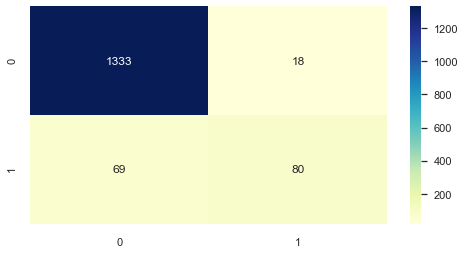

In [263]:
fig=plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

### <a id='link13'>Different parameters of Logistic Regression.</a>

* And reasoning whether the model performance is affected..

## Decision Tree Classifier.

In [264]:
# Append model list.
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()

In [265]:
# Fiting Decision tree on train data.
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [266]:
yhat_tree=tree.predict(x_test)

In [267]:
# Calculating the score.
tree_score=f1_score(y_test,yhat_tree)
model_f1_score.append(tree_score)
tree_score

0.9084745762711866

In [268]:
# Calculate the accuracy score.
tree_accuracy=accuracy_score(y_test,yhat_tree)
model_accuracy_score.append(tree_accuracy)
tree_accuracy

0.982

In [269]:
# Printing the classification report.
print(classification_report(y_test,yhat_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.92      0.90      0.91       149

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



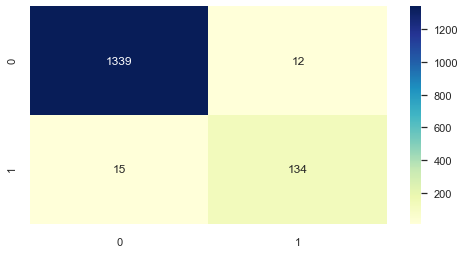

In [270]:
fig=plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,yhat_tree),annot=True,fmt='',cmap='YlGnBu')

# Confusion Matrix Prediction.

In [271]:
# Function to get confusion matrix in a proper format.
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels= [0,1] , yticklabels= [0,1])
    plt.ylabel('Observed')
    plt.xlabel('predicted')
    plt.show()

Training accuracy 0.7868571428571428

Testing accuracy 0.7913333333333333

Confusion Matrix


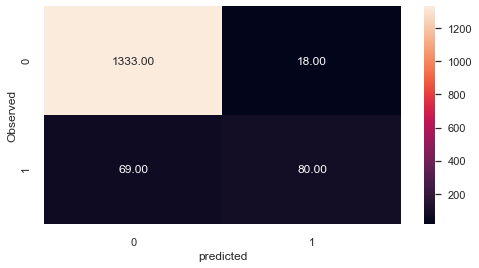

None

Recall: 0.5369127516778524

Precision: 0.8163265306122449

f1 score: 0.6477732793522267

Roc Auc Score: 0.7617946437885931



In [272]:
print("Training accuracy",logreg.score(x_train,y_train))
print()
print("Testing accuracy",logreg.score(x_test,y_test))
print()
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("f1 score:",f1_score(y_test,y_predict))
print()
print('Roc Auc Score:',roc_auc_score(y_test,y_predict))
print()

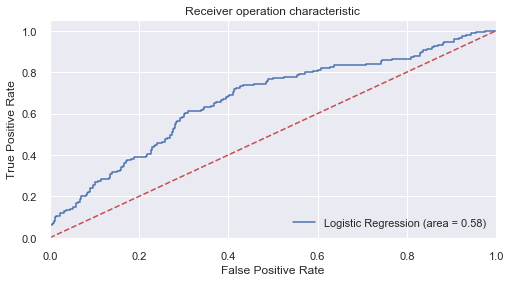

In [273]:
 # !pip install yellowbrick
    
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr,  tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operation characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()



**Improving Model Performance by checking logistic regression parameters.**

In [274]:
# Checking Logistic Regression Parameters.
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [275]:
# Running Loop to check diffrent values of the 'Solver'

tree_score=[]
tree_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # This to check values of the solver.
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945]

[0.942, 0.943, 0.942, 0.942, 0.941, 0.942, 0.942]


In [276]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.945, 0.945]

[0.942, 0.943]


In [277]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.8865714285714286

Testing accuracy 0.8866666666666667


Trainig accuracy 0.8871428571428571

Testing accuracy 0.886

Confusion Matrix


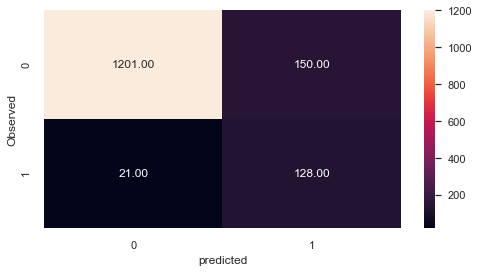

None

Recall: 0.8590604026845637

Precision: 0.460431654676259

F1 Score: 0.5995316159250587

Roc Auc Score: 0.8740157675895063


In [279]:
# Printing the final model.
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [280]:
#!pip install yellowbrick

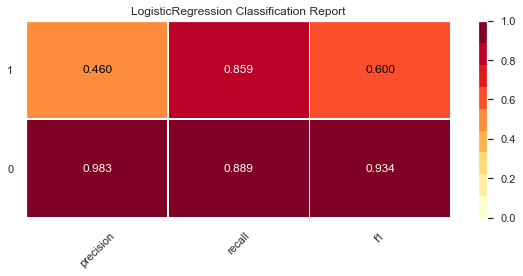

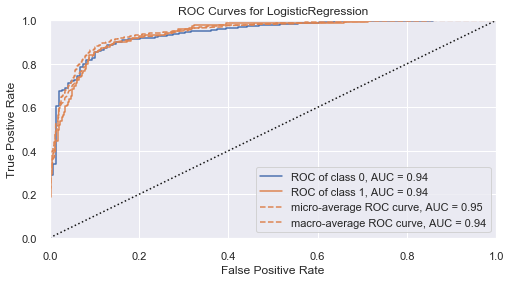

In [281]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library.
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [283]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.141248
         Iterations 9


In [284]:
# Printing Logistic Regression Summary Report.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Printing summary of the logistic Regression.
print(lg.summary())

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.ch12.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.5487
Time:                        16:19:37   Log-Likelihood:                -494.37
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.098e-253
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5522      0.182    -24.983      0.000      -4.909      -4.195
x1            -0.0402      0.085     -0.472      0.637      -0.207       0.127
x2             0.1025      0.084      1.214      0.2

In [285]:
# Calculating odds Ratio, Probability.
## Create a dataFrame to collect Odds ratio, Probability & P-Value of Coef.
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [286]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
x3,2.50,12.15,0.92,0.00
x6,1.41,4.11,0.80,0.00
x4,0.84,2.32,0.70,0.00
x5,0.29,1.34,0.57,0.00
const,-4.55,0.01,0.01,0.00


### <a id='link15'>Business understanding of the model.</a>


**The confusion matrix indicates.**


* **Ture Positive (Observation = 1, Predicted= 1) (TP):** Predicted that 'Personal Loan' will be granted to customers get was eligible to have a Personal loan. 

* **False Positive (Observation = 0, Predicted = 1) (FP):** Predicted that 'Personal Loan' will be granted and the customer was not eligible to get a 'Personal Loan'.

* **True Negatives  (Observation = 0, Predicted = 0,(TN):** Predicted that 'Personal Loan' will be not granted & the customr is not eligable to get a 'Personal Loan'.

* **False Negative  (Observation = 0, predicted = 1 (FP):** Predicted that 'Personal Loan' will be not granted and the customer was eligible to get the 'Personal Loan' 


* After successfully applying all the logistic regression techniques for the model  the bank management wants to give loans to customers who are eligible for the 'Personal Loan' fewer number of false-positive if it is high the bank will be in risk of losing money. note to mention the bank doesn't lose money on customers who are not eligible for a loan. Hence **Precision is the important factor of the metrix**. 

* In the False-negative, the bank will risk losing few customers but that is ok because the bank would like to retain money more than customers who are not eligible for a loan. 

* After achieving the best accuracy score we can deploy the model on practical use. The bank now can predict wisely who is eligible to grant the 'Personal Laon'. the model can be used by the bank  decision-makers.  







### <a id='link16'>References & GitHub Link.</a>

* https://pandas.pydata.org/docs/getting_started/overview.html?highlight=saving%20loading

* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

* https://www.w3schools.com/python/default.asp

* https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

* https://thepythonguru.com/python-lambda-function/#:~:text=Python%20allows%20you%20to%20create,just%20like%20a%20normal%20function.&text=Also%20there%20is%20no%20need%20for%20any%20return%20statement%20in%20lambda%20function.

* https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034361&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9069735&gclid=CjwKCAjwtNf6BRAwEiwAkt6UQivaN7quq-bZJmVF_wVVTfzvzRMxhLG8Lf2lRLmn-BNfxUCTziFNXRoCaFEQAvD_BwE

* https://opentextbc.ca/introductorybusinessstatistics/chapter/regression-basics-2/

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


## GitHub Repository

* https://github.com/command20/This-repository-records-all-the-project-works-that-I-did-in-my-PGP-AIML-program-with-UT-Austin-and-G

